In [5]:
!pip install tensorflow

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import scipy

import re



from string import punctuation
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords



from sklearn.metrics import f1_score, classification_report, accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer, CountVectorizer
from sklearn import linear_model, metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import log_loss, roc_auc_score, confusion_matrix

import gensim.downloader as api


import nltk
nltk.download('stopwords')


import gensim
import itertools


from gensim.models import KeyedVectors
from tensorflow.python.keras import backend as K
from tensorflow.python.keras.layers import Layer
from tensorflow.keras.preprocessing.sequence import pad_sequences






import os
import matplotlib

import tensorflow as tf

from time import time
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam  # Corrected import
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import Input, Embedding, LSTM

matplotlib.use('Agg')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
df = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/Projects/Similarity_Questions/train.csv')
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [8]:
df.columns

Index(['id', 'qid1', 'qid2', 'question1', 'question2', 'is_duplicate'], dtype='object')

In [9]:
df.tail()

,id,qid1,qid2,question1,question2,is_duplicate
404285,404285,433578,379845,How many keywords are there in the Racket prog...,How many keywords are there in PERL Programmin...,0
404286,404286,18840,155606,Do you believe there is life after death?,Is it true that there is life after death?,1
404287,404287,537928,537929,What is one coin?,What's this coin?,0
404288,404288,537930,537931,What is the approx annual cost of living while...,I am having little hairfall problem but I want...,0
404289,404289,537932,537933,What is like to have sex with cousin?,What is it like to have sex with your cousin?,0


In [10]:
df.sample(5)

,id,qid1,qid2,question1,question2,is_duplicate
221721,221721,170190,329141,Is wowecoin legal in India?,Is bitrefill legal in india?,0
253017,253017,291165,367473,I got a new mattress and my lower back pain in...,How can you describe how a cell is like a city?,0
31260,31260,57645,57646,How is the ICICI Direct Center for financial l...,Has anyone tried Adapt Prep study material for...,0
176021,176021,270921,270922,How many students score 300plus in JEE Mains 2...,How much are you scoring in JEE Main 2016?,0
208490,208490,312503,312504,Who is DC's worst street-level character and why?,Who is Marvel and DC's worst-street level char...,0


In [11]:
df.shape

(404290, 6)

In [12]:
df.describe()

,id,qid1,qid2,is_duplicate
count,404290.000000,404290.000000,404290.000000,404290.000000
mean,202144.500000,217243.942418,220955.655337,0.369198
std,116708.614503,157751.700002,159903.182629,0.482588
min,0.000000,1.000000,2.000000,0.000000
25%,101072.250000,74437.500000,74727.000000,0.000000
50%,202144.500000,192182.000000,197052.000000,0.000000
75%,303216.750000,346573.500000,354692.500000,1.000000
max,404289.000000,537932.000000,537933.000000,1.000000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [14]:
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [15]:
df = df.dropna()
df.shape

(404287, 6)

In [16]:
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [17]:
nume = df.is_duplicate.sum()

fraction_of_duplicate_to_total = nume/df.shape[0]

fraction_of_duplicate_to_total

0.3692005926482919

In [18]:
df.drop(['id', 'qid1', 'qid2'], axis=1, inplace=True)

In [19]:
for i in range(0, 11):
    print(df.question1[i])
    print(df.question2[i])
    print()

What is the step by step guide to invest in share market in india?
What is the step by step guide to invest in share market?

What is the story of Kohinoor (Koh-i-Noor) Diamond?
What would happen if the Indian government stole the Kohinoor (Koh-i-Noor) diamond back?

How can I increase the speed of my internet connection while using a VPN?
How can Internet speed be increased by hacking through DNS?

Why am I mentally very lonely? How can I solve it?
Find the remainder when [math]23^{24}[/math] is divided by 24,23?

Which one dissolve in water quikly sugar, salt, methane and carbon di oxide?
Which fish would survive in salt water?

Astrology: I am a Capricorn Sun Cap moon and cap rising...what does that say about me?
I'm a triple Capricorn (Sun, Moon and ascendant in Capricorn) What does this say about me?

Should I buy tiago?
What keeps childern active and far from phone and video games?

How can I be a good geologist?
What should I do to be a great geologist?

When do you use シ instea

In [20]:
print("Number of data points: ",df.shape[0])
print(df["is_duplicate"].value_counts())

Number of data points:  404287
0    255024
1    149263
Name: is_duplicate, dtype: int64


In [21]:
is_dup = df['is_duplicate'].value_counts()

is_dup

0    255024
1    149263
Name: is_duplicate, dtype: int64

In [22]:
sns.barplot(x = is_dup.index,y =  is_dup.values, alpha=0.8)

<Axes: >

In [23]:
# Clean up the text in questions.
'''
La racinisation , stemming en anglais, est le processus de réduction d'un mot à sa racine ou à sa forme de base,
souvent en retirant les préfixes, suffixes ou autres affixes.
L'objectif principal de la racinisation est de normaliser les mots afin de regrouper différentes variantes d'un même mot sous une seule forme.
Par exemple, considérons les mots "joueur", "joueuse", "jouons" et "jouerait". En appliquant la racinisation, on pourrait réduire tous ces mots à leur forme de base, "jou",
en retirant les suffixes respectifs.
'''
def clean(text, stem_words=True):

    if pd.isnull(text):
        return ''

    if type(text) != str or text=='':
        return ''

    # Clean the text
    text = re.sub("\'s", " ", text) # we have cases like "Sam is" or "Sam's" (i.e. his) these two cases aren't separable, I choose to compromise are kill "'s" directly
    text = re.sub(" whats ", " what is ", text, flags=re.IGNORECASE) # replace whats by what is and ignore case (ignorer la distinction entre majuscules et minuscules lors de la recherche de motifs dans le texte)
    text = re.sub("\'ve", " have ", text) # replace 've by have
    text = re.sub("can't", "can not", text) # replace can't by can not
    text = re.sub("n't", " not ", text) # replace n't by not
    text = re.sub("i'm", "i am", text, flags=re.IGNORECASE) # replace i'm by i am and ignore case
    text = re.sub("\'re", " are ", text) # replace 're by are
    text = re.sub("\'d", " would ", text) # replace 'd by would
    text = re.sub("\'ll", " will ", text) # replace 'll by will
    text = re.sub("e\.g\.", " eg ", text, flags=re.IGNORECASE) # replace e.g. by eg and ignore case
    text = re.sub("b\.g\.", " bg ", text, flags=re.IGNORECASE) # replace b.g. by bg and ignore case
    text = re.sub("(\d+)(kK)", " \g<1>000 ", text) # trouver des occurrences de chiffres suivis de "k" ou "K" et les remplace par le chiffre suivi de trois zéros. Par exemple, "5K" deviendrait "5000".
    text = re.sub("e-mail", " email ", text, flags=re.IGNORECASE)
    text = re.sub("(the[\s]+|The[\s]+)?U\.S\.A\.", " America ", text, flags=re.IGNORECASE)
    text = re.sub("(the[\s]+|The[\s]+)?United State(s)?", " America ", text, flags=re.IGNORECASE)
    text = re.sub("\(s\)", " ", text, flags=re.IGNORECASE)
    text = re.sub("[c-fC-F]\:\/", " disk ", text) #  remplace les occurrences de lettres de "c" à "f" ou de "C" à "F" suivies de "://" par "disk". Cela peut être utilisé pour simplifier les chemins de fichiers ou les URL en remplaçant les lettres par une description plus générale.

    # remove comma between numbers, i.e. 15,000 -> 15000
    text = re.sub('(?<=[0-9])\,(?=[0-9])', "", text)

    # add padding to punctuations and special chars, we still need them later
    text = re.sub('\$', " dollar ", text)
    text = re.sub('\%', " percent ", text)
    text = re.sub('\&', " and ", text)

    text = re.sub('[^\x00-\x7F]+', ' non_ascii_word ', text)

    # indian dollar
    text = re.sub("(?<=[0-9])rs ", " rs ", text, flags=re.IGNORECASE)
    text = re.sub(" rs(?=[0-9])", " rs ", text, flags=re.IGNORECASE)

    # clean text rules get from : https://www.kaggle.com/currie32/the-importance-of-cleaning-text
    text = re.sub(r" (the[\s]+|The[\s]+)?US(A)? ", " America ", text)
    text = re.sub(r" UK ", " England ", text, flags=re.IGNORECASE)
    text = re.sub(r" india ", " India ", text)
    text = re.sub(r" switzerland ", " Switzerland ", text)
    text = re.sub(r" china ", " China ", text)
    text = re.sub(r" chinese ", " Chinese ", text)
    text = re.sub(r" imrovement ", " improvement ", text, flags=re.IGNORECASE)
    text = re.sub(r" intially ", " initially ", text, flags=re.IGNORECASE)
    text = re.sub(r" quora ", " Quora ", text, flags=re.IGNORECASE)
    text = re.sub(r" dms ", " direct messages ", text, flags=re.IGNORECASE)
    text = re.sub(r" demonitization ", " demonetization ", text, flags=re.IGNORECASE)
    text = re.sub(r" actived ", " active ", text, flags=re.IGNORECASE)
    text = re.sub(r" kms ", " kilometers ", text, flags=re.IGNORECASE)
    text = re.sub(r" cs ", " computer science ", text, flags=re.IGNORECASE)
    text = re.sub(r" upvote", " up vote", text, flags=re.IGNORECASE)
    text = re.sub(r" iPhone ", " phone ", text, flags=re.IGNORECASE)
    text = re.sub(r" \0rs ", " rs ", text, flags=re.IGNORECASE)
    text = re.sub(r" calender ", " calendar ", text, flags=re.IGNORECASE)
    text = re.sub(r" ios ", " operating system ", text, flags=re.IGNORECASE)
    text = re.sub(r" gps ", " GPS ", text, flags=re.IGNORECASE)
    text = re.sub(r" gst ", " GST ", text, flags=re.IGNORECASE)
    text = re.sub(r" programing ", " programming ", text, flags=re.IGNORECASE)
    text = re.sub(r" bestfriend ", " best friend ", text, flags=re.IGNORECASE)
    text = re.sub(r" dna ", " DNA ", text, flags=re.IGNORECASE)
    text = re.sub(r" III ", " 3 ", text)
    text = re.sub(r" banglore ", " Banglore ", text, flags=re.IGNORECASE)
    text = re.sub(r" J K ", " JK ", text, flags=re.IGNORECASE)
    text = re.sub(r" J\.K\. ", " JK ", text, flags=re.IGNORECASE)

    # replace the float numbers with a random number, it will be parsed as number afterward,
    # and also been replaced with word "number"

    text = re.sub('[0-9]+\.[0-9]+', " 87 ", text)


    '''
    La ponctuation est l'utilisation de signes graphiques dans un texte pour indiquer la structure grammaticale, marquer les pauses et clarifier le sens. Les principaux signes de ponctuation comprennent :

    Point (.),  Point d'interrogation (?), Point d'exclamation (!) , Virgule (,), Point-virgule (;), Deux-points (:), Guillemets (" ", ' ')
    '''
    text = ''.join([c for c in text if c not in punctuation]).lower()

    # Return a list of words
    return text

df['question1'] = df['question1'].apply(clean)
df['question2'] = df['question2'].apply(clean)



In [24]:
# Look at clean data
df.head(10)

,question1,question2,is_duplicate
0,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,0
1,what is the story of kohinoor kohinoor diamond,what would happen if the indian government sto...,0
2,how can i increase the speed of my internet co...,how can internet speed be increased by hacking...,0
3,why am i mentally very lonely how can i solve it,find the remainder when math2324math is divide...,0
4,which one dissolve in water quikly sugar salt ...,which fish would survive in salt water,0
5,astrology i am a capricorn sun cap moon and ca...,i am a triple capricorn sun moon and ascendant...,1
6,should i buy tiago,what keeps childern active and far from phone ...,0
7,how can i be a good geologist,what should i do to be a great geologist,1
8,when do you use nonasciiword instead of non...,when do you use and instead of and,0
9,motorola company can i hack my charter motorol...,how do i hack motorola dcx3400 for free internet,0


In [25]:
# After cleaning the text, we preview those question pairs again.
a = 0
for i in range(a,a+10):
    print(df.question1[i])
    print(df.question2[i])
    print()

what is the step by step guide to invest in share market in india
what is the step by step guide to invest in share market

what is the story of kohinoor kohinoor diamond
what would happen if the indian government stole the kohinoor kohinoor diamond back

how can i increase the speed of my internet connection while using a vpn
how can internet speed be increased by hacking through dns

why am i mentally very lonely how can i solve it
find the remainder when math2324math is divided by 2423

which one dissolve in water quikly sugar salt methane and carbon di oxide
which fish would survive in salt water

astrology i am a capricorn sun cap moon and cap risingwhat does that say about me
i am a triple capricorn sun moon and ascendant in capricorn what does this say about me

should i buy tiago
what keeps childern active and far from phone and video games

how can i be a good geologist
what should i do to be a great geologist

when do you use  nonasciiword  instead of  nonasciiword 
when do y

In [26]:
# Télécharger le modèle Word2Vec de Google News directement depuis le lien
modele_word2vec = api.load('word2vec-google-news-300')

[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [27]:
# Clean up the text
def text_to_word_list(text):
    text = str(text)
    text = text.lower()
    text = re.sub(r"[^A-Za-z0-9^,!.\/'+-=]", " ", text)
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "cannot ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r",", " ", text)
    text = re.sub(r"\.", " ", text)
    text = re.sub(r"!", " ! ", text)
    text = re.sub(r"\/", " ", text)
    text = re.sub(r"\^", " ^ ", text)
    text = re.sub(r"\+", " + ", text)
    text = re.sub(r"\-", " - ", text)
    text = re.sub(r"\=", " = ", text)
    text = re.sub(r"'", " ", text)
    text = re.sub(r"(\d+)(k)", r"\g<1>000", text)
    text = re.sub(r":", " : ", text)
    text = re.sub(r" e g ", " eg ", text)
    text = re.sub(r" b g ", " bg ", text)
    text = re.sub(r" u s ", " american ", text)
    text = re.sub(r"\0s", "0", text)
    text = re.sub(r" 9 11 ", "911", text)
    text = re.sub(r"e - mail", "email", text)
    text = re.sub(r"j k", "jk", text)
    text = re.sub(r"\s{2,}", " ", text)
    text = text.split()

    return text

# We use the 300-dimensional word2vec embeddings from google which can capture intricate
# inter-word relationships such as vec(king) − vec(man) + vec(woman) ≈ vec(queen).
def make_w2v_embeddings(df, embedding_dim=300):
    vocabs = {}
    vocabs_cnt = 0
    vocabs_not_w2v = {}
    vocabs_not_w2v_cnt = 0

    stops = set(stopwords.words('english'))



    word2vec_model_name = 'word2vec-google-news-300'
    word2vec = api.load(word2vec_model_name)

    for index, row in df.iterrows():
        if index != 0 and index % 1000 == 0:
            print("{:,} sentences embedded.".format(index), flush=True)

        for question in ['question1', 'question2']:

            q2n = []
            for word in text_to_word_list(row[question]):
                if word in stops:
                    continue
                if word not in word2vec.key_to_index:
                    if word not in vocabs_not_w2v:
                        vocabs_not_w2v_cnt += 1
                        vocabs_not_w2v[word] = 1
                if word not in vocabs:
                    vocabs_cnt += 1
                    vocabs[word] = vocabs_cnt
                    q2n.append(vocabs_cnt)
                else:
                    q2n.append(vocabs[word])

            df.at[index, question + '_n'] = q2n

    embeddings = 1 * np.random.randn(len(vocabs) + 1, embedding_dim)
    embeddings[0] = 0

    for word, index in vocabs.items():
        if word in word2vec.key_to_index:
            embeddings[index] = word2vec[word]

    del word2vec

    return df, embeddings


def split_and_zero_padding(df, max_seq_length):
    X = {'q1': df['question1_n'], 'q2': df['question2_n']}

    for dataset, side in itertools.product([X], ['q1', 'q2']):
        dataset[side] = pad_sequences(dataset[side], padding='pre', truncating='post', maxlen=max_seq_length)

    return dataset


class ManhattanDistance(Layer):
    def __init__(self, **kwargs):
        super(ManhattanDistance, self).__init__(**kwargs)
        self.result = None

    def build(self, input_shape):
        super(ManhattanDistance, self).build(input_shape)

    def call(self, x, **kwargs):
        self.result = K.exp(-K.sum(K.abs(x[0] - x[1]), axis=1, keepdims=True))
        return self.result

    def compute_output_shape(self, input_shape):
        return K.int_shape(self.result)


In [28]:
#ROOT_PATH = os.path.abspath('/Users/rameshsubedi/Downloads/kaggle')
ROOT_PATH = os.path.abspath('') # It's /Users/rameshsubedi
TRAIN_CSV = 'train.csv'

gpus = 2
#batch_size = 256 * gpus
batch_size = 128 * gpus

n_epoch = 50 # we will be training the whole data (the training data part) 50 times.
#  To learn more about epoch, batch, look here:
# https://stackoverflow.com/questions/4752626/epoch-vs-iteration-when-training-neural-networks
"""
An EPOCH describes the number of times the algorithm sees the entire data set.
So, each time the algorithm has seen all samples in the dataset, an epoch has completed.

An ITERATION describes the number of times a BATCH of data passed through the algorithm.
In the case of neural networks, that means (or ITERATION means) the forward pass and backward pass.
So, every time you pass a batch of data through the NN, you completed an iteration.

Example: if you have 1000 training examples (rows), and your batch size is 500,
then it will take 2 iterations to complete 1 epoch.

In this analysis there are 404287 rows, and batch size is 256, so it will take 404287/256=1579.246
iterations complete one epoch.

"""
#n_hidden = 256
n_hidden = 128

# using 300 dimension for embedding i.e. there will be 300 vectors for each word in the corpora
# represented for neural network model.
embedding_dim = 300
max_seq_length = 25  # length of the longest question has 25 words



In [29]:
def prepare_data():
    train_df = pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/Projects/Similarity_Questions/train.csv")
    for q in ['question1', 'question2']:
        train_df[q + '_n'] = train_df[q]

    train_df, embeddings = make_w2v_embeddings(train_df, embedding_dim=embedding_dim)
    #validation_size = int(len(train_df) * 0.1)
    validation_size = int(len(train_df) * 0.3) # 30% for test (here validation means test), 70% for train

    X = train_df[['question1_n', 'question2_n']]
    Y = train_df['is_duplicate']

    #X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size)
    X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=42)


    X_train = split_and_zero_padding(X_train, max_seq_length)
    X_validation = split_and_zero_padding(X_validation, max_seq_length)

    Y_train = Y_train.values
    Y_validation = Y_validation.values

    assert X_train['q1'].shape == X_train['q2'].shape
    assert len(X_train['q1']) == len(Y_train)

    return X_train, X_validation, Y_train, Y_validation, embeddings



In [30]:

def prepare_model(embeddings):
    shared_model = Sequential()
    # Set trainble=False so that the gradient decent will not optimize the embeddings.
    shared_model.add(Embedding(len(embeddings), embedding_dim, weights=[embeddings], input_shape=(max_seq_length,), trainable=False))
    shared_model.add(LSTM(n_hidden))

    q1_input = Input(shape=(max_seq_length,), dtype='int32')
    q2_input = Input(shape=(max_seq_length,), dtype='int32')

    malstm_distance = ManhattanDistance()([shared_model(q1_input), shared_model(q2_input)])

    # The Model below is due from:  from tensorflow.python.keras.models import Model
    model = Model(inputs=[q1_input, q2_input], outputs=[malstm_distance])

    # if gpus >= 2:
    #     model = tf.keras.utils.multi_gpu_model(model, gpus=gpus)

   # Adam() from here:   from tensorflow.python.keras.optimizers import Adam
    model.compile(loss='mean_squared_error', optimizer=Adam(), metrics=['accuracy'])
    model.summary()
    shared_model.summary()

    return model


In [31]:

def train_model(X_train, X_validation, Y_train, Y_validation, model):
    training_start_time = time()

    checkpointer = ModelCheckpoint(
        filepath=os.path.join(ROOT_PATH, 'model/weights.{epoch:02d}.h5'),
        verbose=1, save_best_only=True, save_weights_only=False, monitor='val_loss', mode='min', period=1)

    malstm_trained = model.fit(
        [X_train['q1'], X_train['q2']],
        Y_train,
        batch_size=batch_size,
        epochs=n_epoch,
        validation_data=([X_validation['q1'], X_validation['q2']], Y_validation),
        callbacks=[checkpointer])

    training_end_time = time()
    print("Training time finished.\n%d epochs in %12.2f" % (n_epoch, training_end_time - training_start_time))

    model.save(os.path.join(ROOT_PATH, 'model/siamese-lstm-weights.h5')) # This file will be created when we run the main function below.

    return malstm_trained



In [32]:
def plot_accuracy_and_loss(malstm_trained):
    plt.subplot(211)
    plt.plot(malstm_trained.history['accuracy'])  # Change 'acc' to 'accuracy'
    plt.plot(malstm_trained.history['val_accuracy'])  # Change 'val_acc' to 'val_accuracy'
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')

    plt.subplot(212)
    plt.plot(malstm_trained.history['loss'])
    plt.plot(malstm_trained.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper right')

    plt.tight_layout(h_pad=1.0)
    plt.savefig(os.path.join(ROOT_PATH, 'model/history-graph.png'))
    print(str(malstm_trained.history['val_accuracy'][-1])[:6] + "(max: " + str(max(malstm_trained.history['val_accuracy']))[:6] + ")")


In [33]:
X_train, X_validation, Y_train, Y_validation, embeddings = prepare_data()

1,000 sentences embedded.
2,000 sentences embedded.
3,000 sentences embedded.
4,000 sentences embedded.
5,000 sentences embedded.
6,000 sentences embedded.
7,000 sentences embedded.
8,000 sentences embedded.
9,000 sentences embedded.
10,000 sentences embedded.
11,000 sentences embedded.
12,000 sentences embedded.
13,000 sentences embedded.
14,000 sentences embedded.
15,000 sentences embedded.
16,000 sentences embedded.
17,000 sentences embedded.
18,000 sentences embedded.
19,000 sentences embedded.
20,000 sentences embedded.
21,000 sentences embedded.
22,000 sentences embedded.
23,000 sentences embedded.
24,000 sentences embedded.
25,000 sentences embedded.
26,000 sentences embedded.
27,000 sentences embedded.
28,000 sentences embedded.
29,000 sentences embedded.
30,000 sentences embedded.
31,000 sentences embedded.
32,000 sentences embedded.
33,000 sentences embedded.
34,000 sentences embedded.
35,000 sentences embedded.
36,000 sentences embedded.
37,000 sentences embedded.
38,000 sen

In [34]:
model = prepare_model(embeddings)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 25)]                 0         []                            
                                                                                                  
 input_2 (InputLayer)        [(None, 25)]                 0         []                            
                                                                                                  
 sequential (Sequential)     (None, 128)                  2597644   ['input_1[0][0]',             
                                                          8          'input_2[0][0]']             
                                                                                                  
 tf.math.subtract (TFOpLamb  (None, 128)                  0         ['sequential[0][0]',      

In [35]:
malstm_trained = train_model(X_train, X_validation, Y_train, Y_validation, model)

Epoch 1/50
1100/1106 [============================>.] - ETA: 0s - loss: 0.1775 - accuracy: 0.7520
Epoch 1: val_loss improved from inf to 0.16265, saving model to /content/model/weights.01.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1106/1106 [==============================] - 18s 12ms/step - loss: 0.1774 - accuracy: 0.7522 - val_loss: 0.1626 - val_accuracy: 0.7689
Epoch 2/50
1105/1106 [============================>.] - ETA: 0s - loss: 0.1542 - accuracy: 0.7881
Epoch 2: val_loss improved from 0.16265 to 0.15283, saving model to /content/model/weights.02.h5
1106/1106 [==============================] - 13s 12ms/step - loss: 0.1542 - accuracy: 0.7881 - val_loss: 0.1528 - val_accuracy: 0.7883
Epoch 3/50
1104/1106 [============================>.] - ETA: 0s - loss: 0.1466 - accuracy: 0.8007
Epoch 3: val_loss improved from 0.15283 to 0.14812, saving model to /content/model/weights.03.h5
1106/1106 [==============================] - 12s 11ms/step - loss: 0.1465 - accuracy: 0.8007 - val_loss: 0.1481 - val_accuracy: 0.7977
Epoch 4/50
1106/1106 [==============================] - ETA: 0s - loss: 0.1415 - accuracy: 0.8088
Epoch 4: val_loss improved from 0.14812 to 0.14497, saving model to /content/model/weights.04.h5
1106/1106 

In [36]:
plot_accuracy_and_loss(malstm_trained)

<ipython-input-32-2ce7a7710069>:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(211)


0.8239(max: 0.8264)


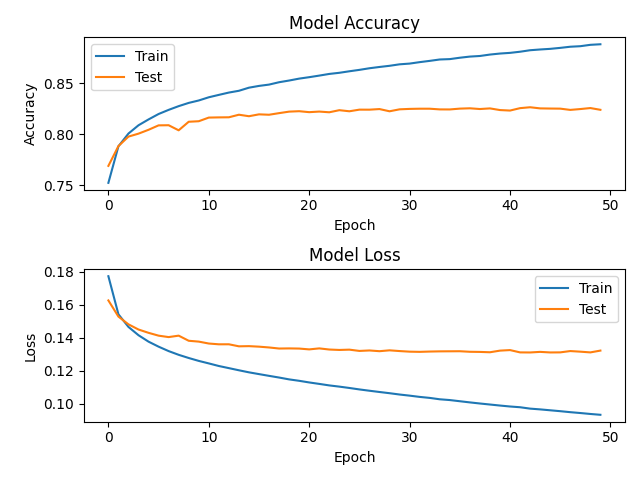

In [37]:
from IPython.display import Image, display

# Ou afficher une image à partir de son chemin local (dans votre espace Google Colab)
image_path = "/content/model/history-graph.png"
display(Image(filename=image_path))


In [38]:
df_pred = pd.DataFrame(np.c_[['Do you believe there is life after death?'] , ['Is it true that there is life after death?']] , columns = ['question1' , 'question2'])



for q in ['question1', 'question2']:
    df_pred[q + '_n'] = df_pred[q]

df_q2n, embeddings = make_w2v_embeddings(df_pred, embedding_dim=embedding_dim)

X = df_q2n[['question1_n', 'question2_n']]

X_pad = split_and_zero_padding(X, max_seq_length)

In [39]:
model_path = '/content/model/siamese-lstm-weights.h5'

# Chargez le modèle
loaded_model = tf.keras.models.load_model(model_path)

prediction = loaded_model.predict([X_pad['q1'], X_pad['q2']])



1/1 [==============================] - 1s 926ms/step


In [40]:
if float(prediction > 0.5) :
  print(f'The two questions are similar.')
else :
  print('There is No similarity')

The two questions are similar.


In [ ]:
df_pred_2 = pd.DataFrame(np.c_[['how can i be a good geologist'] , ['what should i do to be a great geologist']] , columns = ['question1' , 'question2'])



for q in ['question1', 'question2']:
    df_pred_2[q + '_n'] = df_pred_2[q]

df_q2n, embeddings = make_w2v_embeddings(df_pred_2, embedding_dim=embedding_dim)

X_2 = df_q2n[['question1_n', 'question2_n']]

X_pad_2 = split_and_zero_padding(X_2, max_seq_length)

In [ ]:

prediction_2 = loaded_model.predict([X_pad_2['q1'], X_pad_2['q2']])

if float(prediction_2 > 0.5) :
  print(f'The two questions are similar.')
else :
  print('There is No similarity')

In [ ]:
#how can i be a good geologist
#what should i do to be a great geologist